<a href="https://colab.research.google.com/github/cagBRT/FeatureEngineering/blob/master/Feature_Selection_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 1959, done.
remote: Counting objects: 100% (745/745), done.
remote: Compressing objects: 100% (351/351), done.
remote: Total 1959 (delta 437), reused 685 (delta 394), pack-reused 1214
Receiving objects: 100% (1959/1959), 65.23 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (1186/1186), done.
Updating files: 100% (177/177), done.
/content/cloned-repo


The most popular Automated Feature Engineering frameworks in Python that data scientists must know about in 2022.<br>

>Feature Tools<br>
TSFresh<br>
Featurewiz<br>
PyCaret

# Feature Tools<bR>
Featuretools is an open source library for performing automated feature engineering. It is a fantastic tool made to expedite the feature creation process so that more time can be spent on other parts of creating machine learning models. In other words, it makes your data machine learning ready.<bR>

We need to be aware of the following three main parts of the package:<bR>

>Entities<bR>
Deep Feature Synthesis (DFS)<bR>
Feature primitives<bR>

The core of Featuretools is Deep Feature Synthesis (DFS), which is actually a Feature Engineering method. It makes it possible to build new features out of both single and multiple DataFrames.

In [2]:
# install featuretools
!pip install featuretools
import featuretools as ft
data = ft.demo.load_mock_customer()
customers_df = data["customers"]
customers_df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.0/231.0 kB 6.8 MB/s eta 0:00:00


,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [3]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [4]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


Begin by specifying a dictionary containing each DataFrame in our dataset. The index column is also passed along with DataFrames, if one exist.

In [5]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

In [6]:
relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]

In [7]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
)
feature_matrix_customers

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


DFS can generate a feature matrix for any DataFrame in our EntitySet is one of the things that makes it so strong. For instance, suppose we wanted to develop session-specific functionality.

In [8]:
feature_matrix_sessions, features_defs = ft.dfs( dataframes=dataframes, relationships=relationships, target_dataframe_name="sessions"
)
feature_matrix_sessions.head(5)

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(


,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


Understanding Feature Output
Featuretools can also help explain what a feature is and the steps Featuretools took to generate it.

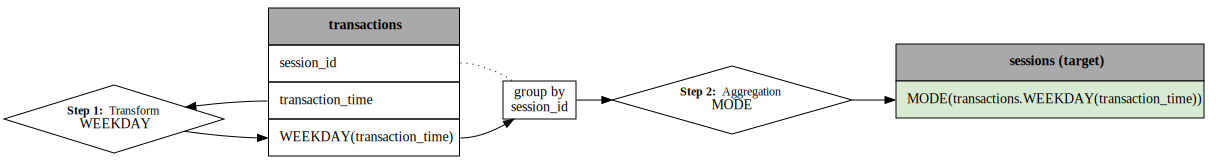

In [9]:
feature = features_defs[18]
ft.graph_feature(feature)



---



---



# TSFresh
TSFresh is an open-source Python library. It combines well-known algorithms from statistics, time-series analysis, signal processing, and nonlinear dynamics with a reliable feature selection approach to give systematic time-series feature extraction. In this context, the term “time-series” is used in the broadest sense imaginable, making it feasible to characterize any forms of sampled data or even event sequences.<br>

TSFRESH automatically extracts 100s of features from time series. Those features describe basic characteristics of the time series such as the number of peaks, the average or maximal value or more complex features such as the time reversal symmetry statistic.



In [10]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.9 MB/s eta 0:00:00


In [11]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()


The first column is the DataFrame index and has no meaning here. There are six different time series (F_x, F_y, F_z, T_x, T_y, T_z) for the different sensors. The different robots are denoted by the ids column.

In [12]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


 For the samples with ids 1 to 5 no failure was reported.

In [13]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

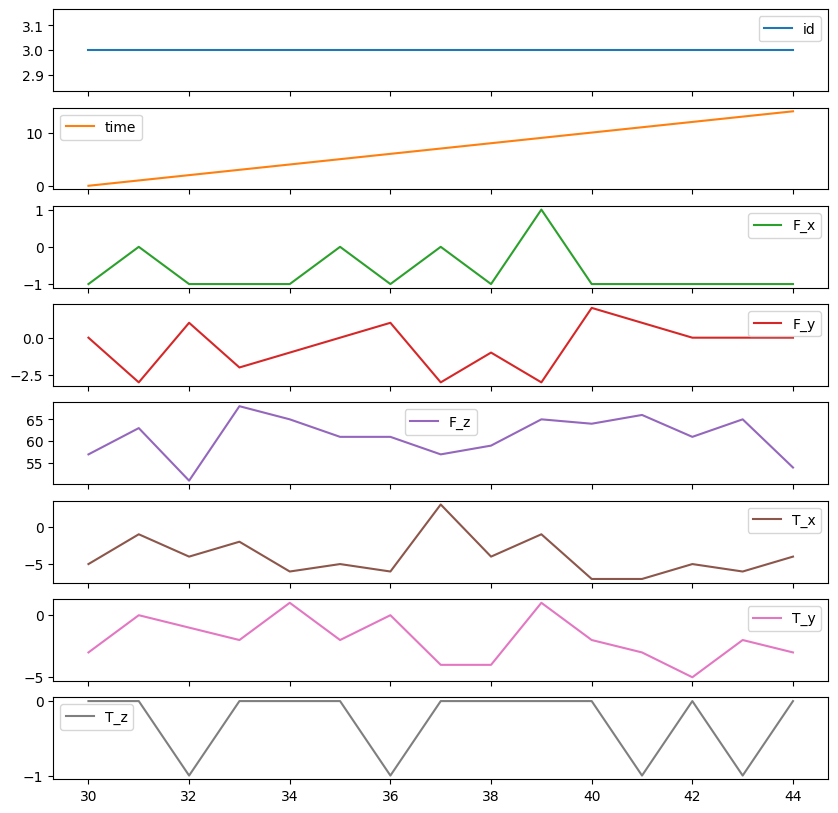

In [14]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

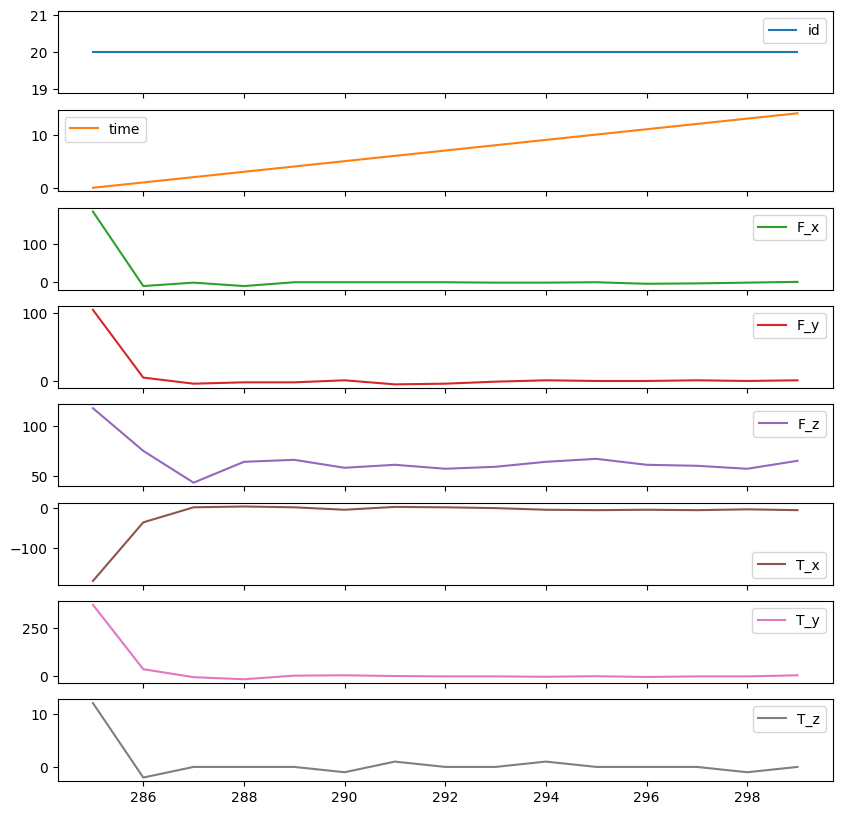

In [15]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

You can already see some differences by eye - but for successful machine learning we have to put these differences into numbers.

For this, tsfresh comes into place. It allows us to automatically extract over 1200 features from those six different time series for each robot.



In [16]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 528/528 [00:34<00:00, 15.50it/s]


You end up with the DataFrame extracted_features with more than 1200 different extracted features. We will now first, remove all NaN values (which were created by feature calculators that can not be used on the given data, e.g., because the statistics are too low), and then select only the relevant features:

In [17]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


Only around 300 features were classified as relevant enough.

Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [18]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 528/528 [00:22<00:00, 23.73it/s]


You can now use the features in the DataFrame features_filtered (which is equal to features_filtered_direct) in conjunction with y to train your classification model.

In [19]:
features_filtered_direct

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,71.641254,38.559593,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,16.349699,14.429645,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,71.095480,60.760842,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,173.699573,109.029954,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2




---



---



**What is featurewiz?**<br>
featurewiz is a new python library to find the best features in your dataset if you give it the dataframe and the name of the target variable. It will do the following:

1. Remove highly correlated features automatically (the limit is set to 0.70 but you can change it in the input argument)
2. If multiple features are correlated to each other, which one to remove? In case of such clashes, it will remove the feature with the lower mutual information score
3. Recursively do feature selection using XGBoost algorithm to find the best features using XGBoost

# Featurewiz
Featurewiz is an open-source python library that is an efficient and fast way to find out important feature from the dataset. It is relatively a new library and it works on two different techniques which collectively helps in finding out the best features:<br>

a) **SULOV**
Searching for the uncorrelated list of variables: This method identifies the pair of variables that are externally crossing a correlation threshold and are therefore considered highly connected by searching for the uncorrelated list of variables. The MIS (Mutual Information Score), a measurement of the amount of information one may receive from one random variable given another, is calculated after the pairs have been identified.

Then, it considers the pair of variables with the lowest correlation and the greatest MIS ratings. which are processed further.

b) **Recursive XGBoost**
The variables that are identified by SULOV are then recursively passed to XGBoost, which helps in identifying the optimal features according to the target variable. This is accomplished by splitting the data into smaller datasets from the original data and recursively train XGBoost model.

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
filename = 'BankChurners.csv'

In [23]:
!pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.7 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=648e7054efa71b112afd2da0f1a8e59526cef1d8fcba3aef7f78eae55d875828
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26

In [24]:
from featurewiz import featurewiz

Imported lazytransform v1.16. 

Imported featurewiz 0.5.7. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [29]:
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [31]:
target = 'Attrition_Flag'

In [32]:
feats = featurewiz(df, target, corr_limit=0.7, verbose=0)
len(feats)

featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (10127, 21)
    Single_Label Binary_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Binary_Classification problem 
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        1 variable(s) to be removed since ID or low-information variables
    	variables removed = ['CLIENTNUM']
Removing 1 columns from further proce

2

# Featurewiz selects 11 variables as worth using in a model.
Let's see how the 11 features compares to the full 21 features that are in the data set

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#RFC = RandomForestRegressor(n_estimators=200, bootstrap=True,
RFC = RandomForestClassifier(n_estimators=200, bootstrap=True,
                            oob_score=True, random_state=43)


In [34]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

20

In [98]:
from featurewiz import FE_convert_all_object_columns_to_numeric
dfx=FE_convert_all_object_columns_to_numeric(df)

df['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1], inplace=True)
df['Gender'].replace(['F','M'],[0,1], inplace=True)
df['Education_Level'].replace(['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],[0,1,2,3,5,6,7], inplace=True)
df['Marital_Status'].replace(['Divorced','Married','Single','Unknown'],[0,1,2,3], inplace=True)
df['Income_Category'].replace(['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],[0,1,2,4,5,6], inplace=True)
df['Card_Category'].replace(['Blue', 'Gold', 'Silver', 'Platinum'],[0,1,2,3], inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,0,45,0,3,2,0,2,2,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,0,41,1,5,5,1,4,0,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,0,50,0,3,6,2,0,0,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,0,58,0,2,5,1,1,0,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,0,39,1,3,3,2,2,0,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [99]:
X = df[preds]
#y_map = {'Existing Customer':0,'Attrited Customer':1}
y = df['Attrition_Flag']

In [90]:
X.shape

(10127, 20)

In [81]:
y.shape

(10127,)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=99)
print(X_train.shape, y_train.shape)

(9114, 20) (9114,)


In [101]:
X_train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5664,708946008,46,0,3,3,1,1,0,36,5,2,2,1438.3,1214,224.3,0.783,2445,39,0.444,0.844
4565,720570333,48,0,3,3,1,1,0,36,5,3,0,1912.0,1163,749.0,0.871,4786,81,0.723,0.608
7718,714142158,59,0,0,5,1,1,0,48,2,2,1,2120.0,1411,709.0,0.665,3882,92,0.643,0.666
796,778799583,35,0,0,0,1,1,0,24,6,1,1,2592.0,2227,365.0,0.633,1695,48,0.548,0.859
2323,718361583,56,0,2,1,1,0,0,36,3,3,5,8242.0,0,8242.0,0.434,1559,44,0.467,0.000


In [102]:
X_train.Card_Category.unique()

array([0, 1, 2, 3])

In [103]:
X_train.isin(['Blue']).any()

CLIENTNUM                   False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [104]:
from sklearn.model_selection import cross_val_score
full = cross_val_score(RFC, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)
print('Average Cross Validation Accuracy using full set of variables = %0.1f%%' %(
                        np.mean(full)*100))

Average Cross Validation Accuracy using full set of variables = 96.1%
